In [1]:
import pandas as pd #data analysis
import numpy as np #stastical analysis
import seaborn as sns #visualization
import matplotlib.pyplot as plt #plotting
%matplotlib inline
import math


In [ ]:
#Implementing Logictic Regression Regression-Titanic Data - predicting whether passenger survived or not

In [2]:
titanic_data= pd.read_csv(r'D:\CBD 3384 - project\Titanicdataset.zip')

In [3]:
# Exploring Data

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.shape

(418, 12)

In [7]:
# Analyzing Data

In [8]:
#Checking how many passengers survived and not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

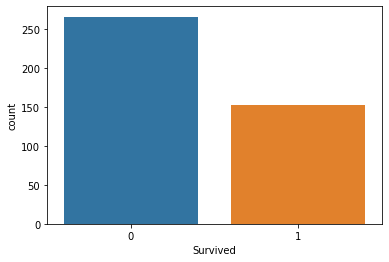

In [9]:
sns.countplot(x="Survived", data=titanic_data)

In [10]:
# Checking the gender of the passengers who survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

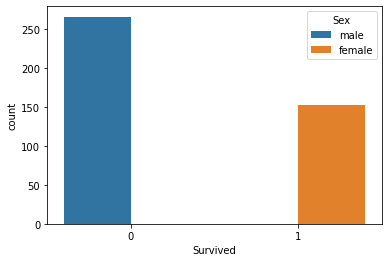

In [11]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

In [12]:
#checking the class of passenger in which they were travelling

<AxesSubplot:xlabel='Survived', ylabel='count'>

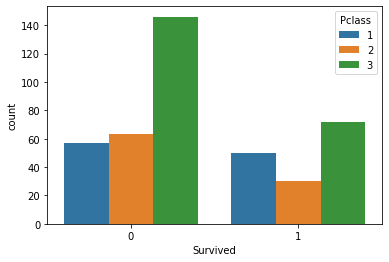

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

In [14]:
#Plotting histogram to check the age group of the passengers

<AxesSubplot:ylabel='Frequency'>

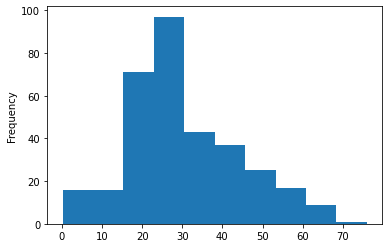

In [15]:
titanic_data["Age"].plot.hist()

In [ ]:
#Fares given by passengers

<AxesSubplot:ylabel='Frequency'>

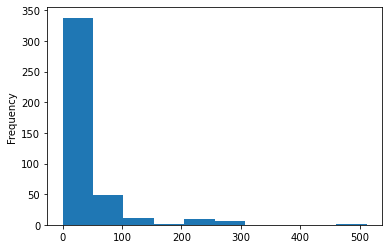

In [16]:
titanic_data["Fare"].plot.hist()

In [17]:
# Data Wrangling - checking null values and missing values 

In [18]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# maximum null values are in  age and cabin column

In [20]:
#dropping the cabin cloumn

In [21]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [22]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
#For age column doing the data imputation , replace the NULL values with True
titanic_data.dropna(inplace=True)

In [24]:
titanic_data.isnull().sum()
#Now there are zero null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
# Data Conversion - Converting string values to Categorical variables ,in order to do logistic regression

In [26]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 31.0+ KB


In [27]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [28]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)
#left two values - can be categorical

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [29]:
PCL=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
PCL.head(5)
#left two values - can be categorical

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [30]:
titanic_data=pd.concat([titanic_data,embark],axis=1)

In [31]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1


In [32]:
titanic_data=pd.concat([titanic_data,PCL],axis=1)

In [33]:
titanic_data=pd.concat([titanic_data,sex],axis=1)

In [34]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,2,3,male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,0,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,1,0


In [35]:
titanic_data.drop(["Name","Sex","Pclass","Embarked"], axis=1, inplace=True)

In [36]:
titanic_data.drop(["Fare","PassengerId"], axis=1, inplace=True)

In [44]:
titanic_data.drop(["Ticket"], axis=1, inplace=True)

In [45]:
#Train data

In [46]:
X= titanic_data.drop("Survived", axis=1)
y= titanic_data["Survived"]

In [47]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=41)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel=LogisticRegression()

In [63]:
logmodel.fit(X_train, y_train)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [64]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Q,S,2,3,male
0,0,34.5,0,0,1,0,0,1,1
1,1,47.0,1,0,0,1,0,1,0
2,0,62.0,0,0,1,0,1,0,1
3,0,27.0,0,0,0,1,0,1,1
4,1,22.0,1,1,0,1,0,1,0


In [65]:
predictions = logmodel.predict(X_test)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [67]:
logmodel.score(X_test, y_test)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [68]:
from sklearn.metrics import classification_report

In [69]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        65\n           1       1.00      1.00      1.00        35\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test,predictions)

array([[65,  0],
       [ 0, 35]], dtype=int64)